In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import ttest_rel, ttest_ind
%matplotlib inline

## Read various probabilty tables

In [6]:
df = pd.DataFrame()
files_xls = ["../ProbTable2009.xlsx", "../ProbTable2010.xlsx"]

In [7]:
for f in files_xls:
    data = pd.read_excel(f, 'Sheet1')
    df = df.append(data)

In [11]:
df.head()
df.tail()

,P(+|-)tick,P(+)tick,P(+|-)1s,P(+)1s,P(+|-)3s,P(+)3s,P(+|-)5s,P(+)5s,P(+|-)10s,P(+)10s,P(+|-)20s,P(+)20s,P(+|-)30s,P(+)30s,P(+|-)1T,P(+)1T,P(+|-)5T,P(+)5T
20101227,0.507582,0.485210,0.625322,0.510298,0.595684,0.508787,0.567832,0.508422,0.552688,0.514867,0.536585,0.508756,0.526462,0.514865,0.505155,0.474255,0.617647,0.534247
20101228,0.520866,0.486997,0.577957,0.488425,0.542905,0.483188,0.516506,0.477917,0.480126,0.487674,0.491589,0.500467,0.475543,0.493113,0.452128,0.491892,0.432432,0.500000
20101229,0.524385,0.500110,0.569021,0.493001,0.535066,0.494421,0.504714,0.496200,0.457843,0.493042,0.452727,0.496798,0.449864,0.503365,0.488764,0.518919,0.500000,0.486486
20101230,0.611123,0.513879,0.649875,0.521865,0.615385,0.523026,0.581476,0.529951,0.550489,0.521558,0.566600,0.530784,0.542274,0.532698,0.478947,0.486486,0.513514,0.500000
20101231,0.595550,0.530233,0.626106,0.509939,0.597641,0.505829,0.565960,0.512209,0.518555,0.505075,0.469388,0.509107,0.468085,0.490515,0.422619,0.542234,0.342857,0.527027


## Break down data into various periods


In [28]:
Prob_df_period_wise = []
events = ['20090101' ,'20090831',  '20091203', '20101231']

for event in range (0,len(events)-1):
    print(event)
    Prob_df_period_wise.append( df[(df.index.astype(str) < events[event+1]) & (df.index.astype(str) > events[event])])


0
1
2


## t-test analysis
1. Paired two-sample for P(+) vs P(+|-) for various timespans
2. Independent pair wise on various pairs of events for various timespans 

In [31]:
timespans = ['tick','1s', '3s', '5s', '10s', '20s', '30s', '1T', '5T']
len(Prob_df_period_wise)

3

In [38]:
# 1. Paired two-sample
for period in range(0, len(Prob_df_period_wise)):
    print("=========Period:",period)
    for timespan in timespans:
        print("=========Timespan:",timespan)
        print(ttest_rel(Prob_df_period_wise[period]['P(+|-)'+timespan].values,Prob_df_period_wise[period]['P(+)'+timespan].values))

=========Period: 0
=========Timespan: tick
Ttest_relResult(statistic=25.084662438354322, pvalue=5.640569846980332e-57)
=========Timespan: 1s
Ttest_relResult(statistic=86.50329372824099, pvalue=5.3983060414720381e-135)
=========Timespan: 3s
Ttest_relResult(statistic=39.829878734145417, pvalue=2.6653986179399894e-84)
=========Timespan: 5s
Ttest_relResult(statistic=17.348080735100176, pvalue=2.0237114246653406e-38)
=========Timespan: 10s
Ttest_relResult(statistic=-7.3755982519526766, pvalue=8.6883543726699117e-12)
=========Timespan: 20s
Ttest_relResult(statistic=-19.926082180596584, pvalue=5.8256584365828949e-45)
=========Timespan: 30s
Ttest_relResult(statistic=-21.642275859739154, pvalue=4.0495382478584349e-49)
=========Timespan: 1T
Ttest_relResult(statistic=-22.190808109890728, pvalue=2.0532753220315099e-50)
=========Timespan: 5T
Ttest_relResult(statistic=-6.2238868021949001, pvalue=4.1812820968361782e-09)
=========Period: 1
=========Timespan: tick
Ttest_relResult(statistic=12.393130854

In [54]:
# 2. Independent two-sample across periods
for timespan in timespans:
    print("==== timespan:", timespan)
    
    print("==== Perio 0 vs Period 1====")
    print(ttest_ind(Prob_df_period_wise[0]['P(+|-)'+timespan].values,Prob_df_period_wise[1]['P(+)'+timespan].values))
    print("==== Perio 1 vs Period 2====")
    print(ttest_ind(Prob_df_period_wise[0]['P(+|-)'+timespan].values,Prob_df_period_wise[1]['P(+)'+timespan].values))
    print("==== Perio 0 vs Period 2====")
    print(ttest_ind(Prob_df_period_wise[0]['P(+|-)'+timespan].values,Prob_df_period_wise[1]['P(+)'+timespan].values))







==== timespan: tick
==== Perio 0 vs Period 1====
Ttest_indResult(statistic=11.679105524813352, pvalue=8.1459765907256268e-25)
==== Perio 1 vs Period 2====
Ttest_indResult(statistic=11.679105524813352, pvalue=8.1459765907256268e-25)
==== Perio 0 vs Period 2====
Ttest_indResult(statistic=11.679105524813352, pvalue=8.1459765907256268e-25)
==== timespan: 1s
==== Perio 0 vs Period 1====
Ttest_indResult(statistic=45.281866778323689, pvalue=3.6176320558584532e-113)
==== Perio 1 vs Period 2====
Ttest_indResult(statistic=45.281866778323689, pvalue=3.6176320558584532e-113)
==== Perio 0 vs Period 2====
Ttest_indResult(statistic=45.281866778323689, pvalue=3.6176320558584532e-113)
==== timespan: 3s
==== Perio 0 vs Period 1====
Ttest_indResult(statistic=21.472690534256973, pvalue=8.4770629019925396e-56)
==== Perio 1 vs Period 2====
Ttest_indResult(statistic=21.472690534256973, pvalue=8.4770629019925396e-56)
==== Perio 0 vs Period 2====
Ttest_indResult(statistic=21.472690534256973, pvalue=8.477062901

### Backup

Box plots, period wise

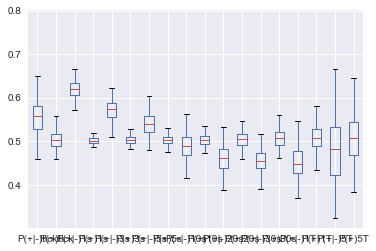

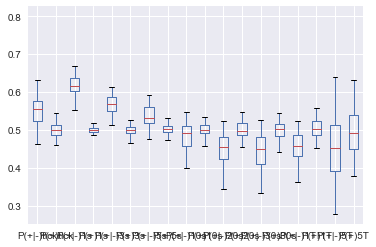

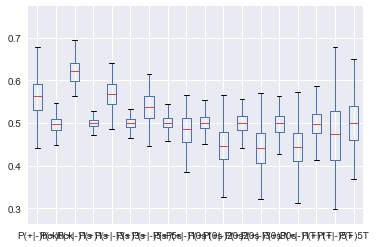

In [53]:
display(Prob_df_period_wise[0].boxplot())
plt.show()
display(Prob_df_period_wise[1].boxplot())
plt.show()
display(Prob_df_period_wise[2].boxplot())
plt.show()